In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dat = pd.read_csv('testing.csv')

In [3]:
dat.head()

,site_id,site_name,country,reify_managed,research_indications,last_login,total_patients,site_trials,last_activity,tas,sponsors
0,18b691b2-a807-5642-97f1-f03ce57b3319,CIMS Hospital,IN,False,NaN,2021-06-11 02:32:16+00,13.0,1.0,NaN,0.0,1.0
1,7e150ffa-2771-57a0-89f3-484a2d6c6772,Centre Léon Bérard - Pediatric Oncology,FR,False,NaN,2021-09-21 07:24:17+00,1.0,4.0,NaN,0.0,1.0
2,64426fd0-759d-5893-91c2-0d4d827e8176,Hospital Santa Caterina (PSU),ES,True,NaN,NaN,5.0,2.0,NaN,0.0,1.0
3,5d82caf5-5da7-5c04-b2dd-ee6cc131e4f5,Hospital Civil de Guadalajara Fray Antonio Alc...,MX,False,NaN,2022-05-18 17:41:34+00,6.0,4.0,NaN,0.0,1.0
4,420c8c6f-9b74-5ca1-8393-e85944756664,James Lind Centro de Investigación del Cáncer,CL,False,NaN,2022-03-01 15:57:34+00,NaN,14.0,NaN,1.0,3.0


In [4]:
dat[(dat['last_activity'].notna()) & (dat['last_activity'] != 0)]

,site_id,site_name,country,reify_managed,research_indications,last_login,total_patients,site_trials,last_activity,tas,sponsors
9,1d3afd09-762d-5500-8976-07df11533adc,Tallahassee Memorial Cancer Center,US,False,1.0,2022-05-02 16:50:45+00,1149.0,3.0,2022-01-25,1.0,1.0
10,e645e855-f69a-5675-a99f-e442a5518f20,Lynn Health Science Institute,US,False,1.0,2021-11-18 19:36:41+00,62.0,1.0,2021-11-18,0.0,1.0
13,5a38ccb5-27c1-5731-9143-75f3844e6a75,Mayo Clinic Arizona - Oncology,US,False,1.0,2021-11-15 22:31:39+00,9.0,4.0,2021-11-15,1.0,3.0
14,a23dc7a3-58d6-55db-85be-e87cb115bfea,Thomas Jefferson University - Endocrinology,US,False,1.0,2022-05-11 19:20:52+00,859.0,7.0,2022-01-20,0.0,2.0
26,bb33a9c1-b97f-54c3-a24f-1d5aabb1ee7d,Servicios Medicos URUMED Spa,CL,False,NaN,2022-05-10 18:03:23+00,6.0,5.0,2022-04-13,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
7764,1c8db4dc-55e6-5284-96a3-52e9a28682d3,North Georgia Clinical Research,US,False,2.0,2022-05-24 16:07:09+00,159.0,5.0,2022-03-17,0.0,1.0
7768,1fd392cd-60e7-572d-ac08-e4a1f3235470,Florida Research Institute - Lakewood Ranch,US,False,1.0,2022-05-11 20:05:20+00,96.0,1.0,2021-12-03,0.0,1.0
7848,f0f469cf-af2a-5a84-b137-d931111864e1,Accelemed Research Institute,US,False,3.0,2022-05-24 17:01:50+00,1899.0,11.0,2022-04-27,NaN,NaN
7907,c013c0e8-f0f7-53a9-9714-a8ac406c1efe,"Bluegrass Community Research, Inc.",US,False,NaN,2021-11-11 14:28:39+00,1.0,1.0,2021-11-11,NaN,NaN


Get cutoff point for 'churned'

In [5]:
dat['last_login'] = pd.to_datetime(dat['last_login']).dt.tz_localize(None)
dat['last_activity'] = pd.to_datetime(dat['last_activity']).dt.tz_localize(None)
dat['today'] = pd.to_datetime("today")

In [6]:
dat['days_since_login'] = (dat['today'] - dat['last_login']).dt.days
dat['days_since_activity'] = (dat['today'] - dat['last_activity']).dt.days

In [7]:
dat['cutoff'] = dat['days_since_login'].mean() + dat['days_since_login'].std()

In [8]:
dat['churned'] = np.where(dat['days_since_login'] >= dat['cutoff'], 1, 0)

In [9]:
dat.churned.mean()

0.13989057448395922

In [10]:
dat.describe()

,research_indications,total_patients,site_trials,tas,sponsors,days_since_login,days_since_activity,cutoff,churned
count,1759.000000,4673.000000,7017.000000,6490.000000,6490.000000,7491.000000,1107.000000,8.042000e+03,8042.000000
mean,3.753837,114.292960,2.337466,0.198151,1.165177,330.695902,85.936766,7.329156e+02,0.139891
std,14.565735,736.825893,6.016308,0.413066,0.451523,402.219704,53.319905,1.148308e-11,0.346895
min,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000,36.000000,7.329156e+02,0.000000
25%,1.000000,5.000000,1.000000,0.000000,1.000000,22.000000,38.000000,7.329156e+02,0.000000
50%,1.000000,16.000000,1.000000,0.000000,1.000000,178.000000,66.000000,7.329156e+02,0.000000
75%,3.000000,66.000000,2.000000,0.000000,1.000000,442.000000,120.000000,7.329156e+02,0.000000
max,322.000000,33401.000000,301.000000,3.000000,5.000000,2073.000000,218.000000,7.329156e+02,1.000000


<AxesSubplot:>

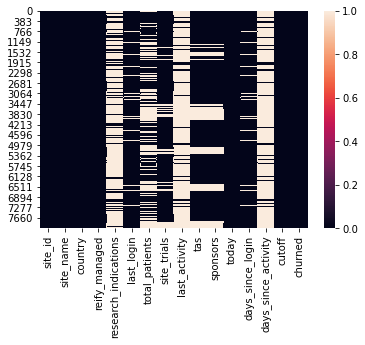

In [11]:
sns.heatmap(dat.isnull())

In [12]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   site_id               8042 non-null   object        
 1   site_name             8042 non-null   object        
 2   country               8042 non-null   object        
 3   reify_managed         8042 non-null   bool          
 4   research_indications  1759 non-null   float64       
 5   last_login            7491 non-null   datetime64[ns]
 6   total_patients        4673 non-null   float64       
 7   site_trials           7017 non-null   float64       
 8   last_activity         1107 non-null   datetime64[ns]
 9   tas                   6490 non-null   float64       
 10  sponsors              6490 non-null   float64       
 11  today                 8042 non-null   datetime64[ns]
 12  days_since_login      7491 non-null   float64       
 13  days_since_activit

In [13]:
dat = dat.fillna(0)

In [19]:
feature_cols = ['reify_managed','research_indications','total_patients','site_trials','tas','sponsors','days_since_login','days_since_activity']
x = dat[feature_cols]
y = dat.churned.ravel()

In [20]:
x.head()

,reify_managed,research_indications,total_patients,site_trials,tas,sponsors,days_since_login,days_since_activity
0,False,0.0,13.0,1.0,0.0,1.0,357.0,0.0
1,False,0.0,1.0,4.0,0.0,1.0,255.0,0.0
2,True,0.0,5.0,2.0,0.0,1.0,0.0,0.0
3,False,0.0,6.0,4.0,0.0,1.0,15.0,0.0
4,False,0.0,0.0,14.0,1.0,3.0,93.0,0.0


In [34]:
lr = LogisticRegression(solver='liblinear', random_state=0, class_weight = 'balanced',max_iter = 1000)

In [35]:
lr.fit(x, y)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0,
                   solver='liblinear')

In [36]:
lr.coef_

array([[-2.01025588e-01, -2.16187828e-03, -3.44003397e-05,
        -8.17100502e-02, -2.06606500e-01, -1.08332682e-01,
         1.97707040e-02,  1.77494420e-02]])

In [ ]:
#Optimal cutpoint for days since login - flag sites for engagement after x number of days with no login. Different cutpoints based on # of site-trials.